In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
df=pd.read_csv('/kaggle/input/web-page-phishing-detection-dataset/dataset_phishing.csv')
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [3]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["status"] = label_encoder.fit_transform(df["status"])

In [5]:
A=df[['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'web_traffic', 'dns_record', 'google_index', 'page_rank']]
B=df['status']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 8 59 61 63 68 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Top 20 features selected:
 ['google_index' 'page_rank' 'nb_www' 'ratio_digits_url' 'nb_hyperlinks'
 'domain_in_title' 'phish_hints' 'domain_age' 'ip' 'nb_qm'
 'ratio_intHyperlinks' 'length_hostname' 'length_url' 'nb_slash' 'nb_eq'
 'ratio_digits_host' 'shortest_word_host' 'tld_in_subdomain'
 'longest_word_path' 'prefix_suffix']


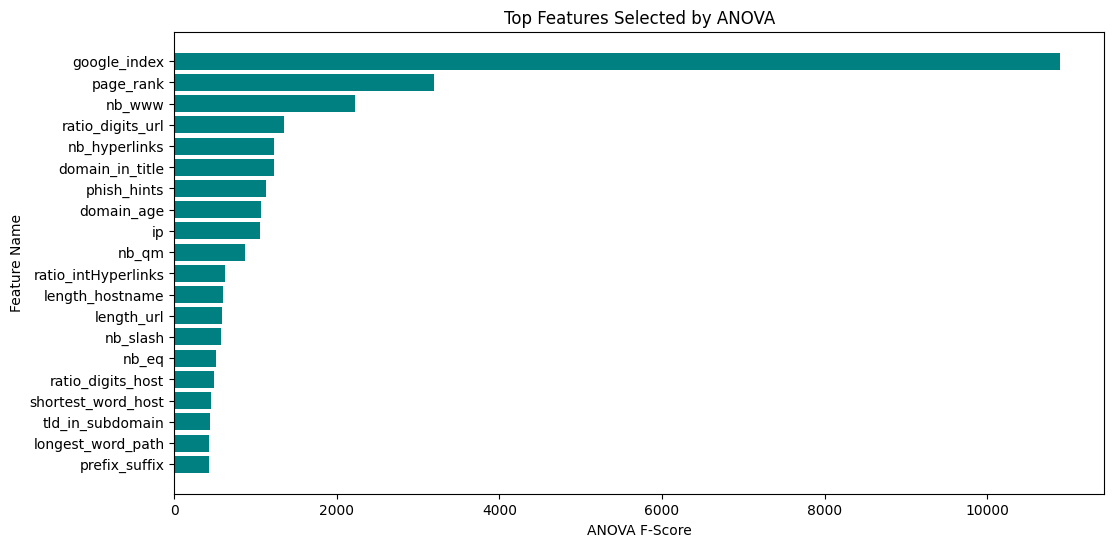

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

# Load dataset

# Encode target variable (phishing = 1, legitimate = 0)
label_encoder = LabelEncoder()
df["status"] = label_encoder.fit_transform(df["status"])

# Drop non-useful features (keeping only numerical features)
X = df.drop(columns=["url", "status"])  # Drop URL column
y = df["status"]

# Split into train & test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize numerical features (for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ANOVA F-test
f_scores, p_values = f_classif(X_train_scaled, y_train)

# Store feature importance
anova_results = pd.DataFrame({"Feature": X.columns, "F-Score": f_scores, "p-value": p_values})
anova_results = anova_results.sort_values(by="F-Score", ascending=False)

# Select top k features (e.g., top 20)
top_k = 20
top_features = anova_results.head(top_k)["Feature"].values
print(f"Top {top_k} features selected:\n", top_features)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(anova_results["Feature"][:top_k], anova_results["F-Score"][:top_k], color="teal")
plt.xlabel("ANOVA F-Score")
plt.ylabel("Feature Name")
plt.title("Top Features Selected by ANOVA")
plt.gca().invert_yaxis()
plt.show()


In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe with all the columns listed above
# and 'status' is your target variable (categorical)

# Create a dictionary to store ANOVA F-values and p-values
feature_importance = {}

# Apply ANOVA for each feature
for feature in df.columns[:-1]:  # Exclude the target variable 'status'
    if df[feature].dtype in ['int64', 'float64']:  # Only apply to numerical features
        groups = []
        for status_value in df['status'].unique():
            groups.append(df[df['status'] == status_value][feature].values)

        # Calculate ANOVA
        f_val, p_val = stats.f_oneway(*groups)

        # Store the F-value and p-value
        feature_importance[feature] = {'F-value': f_val, 'p-value': p_val}

# Convert to DataFrame for easier sorting and viewing
importance_df = pd.DataFrame.from_dict(feature_importance, orient='index')

# Sort by F-value in descending order (higher F-value indicates more importance)
importance_df = importance_df.sort_values(by='F-value', ascending=False)

# Display the top 20 features
top_20_features = importance_df.head(20).index.tolist()
print("Top 20 features based on ANOVA F-value:")
for i, feature in enumerate(top_20_features, 1):
    print(f"{i}. {feature} (F-value: {importance_df.loc[feature, 'F-value']:.2f}, p-value: {importance_df.loc[feature, 'p-value']:.4f})")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Top 20 features based on ANOVA F-value:
1. google_index (F-value: 13127.79, p-value: 0.0000)
2. page_rank (F-value: 4041.61, p-value: 0.0000)
3. nb_www (F-value: 2797.67, p-value: 0.0000)
4. ratio_digits_url (F-value: 1662.75, p-value: 0.0000)
5. domain_in_title (F-value: 1521.82, p-value: 0.0000)
6. nb_hyperlinks (F-value: 1520.02, p-value: 0.0000)
7. phish_hints (F-value: 1448.45, p-value: 0.0000)
8. domain_age (F-value: 1414.62, p-value: 0.0000)
9. ip (F-value: 1319.20, p-value: 0.0000)
10. nb_qm (F-value: 1083.82, p-value: 0.0000)
11. length_url (F-value: 752.67, p-value: 0.0000)
12. ratio_intHyperlinks (F-value: 723.34, p-value: 0.0000)
13. nb_slash (F-value: 712.59, p-value: 0.0000)
14. length_hostname (F-value: 688.17, p-value: 0.0000)
15. nb_eq (F-value: 658.33, p-value: 0.0000)
16. ratio_digits_host (F-value: 605.61, p-value: 0.0000)
17. shortest_word_host (F-value: 598.52, p-value: 0.0000)
18. prefix_suffix (F-value: 552.14, p-value: 0.0000)
19. longest_word_path (F-value: 54

In [8]:
X=df[['google_index','page_rank','nb_www','ratio_digits_url','domain_in_title','nb_hyperlinks','phish_hints','domain_age','ip','nb_qm','length_url','ratio_intHyperlinks','nb_slash','length_hostname','nb_eq','ratio_digits_host','shortest_word_host','prefix_suffix','longest_word_path','tld_in_subdomain']]
y=df['status']

In [9]:
data=df[['google_index','page_rank','nb_www','ratio_digits_url','domain_in_title','nb_hyperlinks','phish_hints','domain_age','ip','nb_qm','length_url','ratio_intHyperlinks','nb_slash','length_hostname','nb_eq','ratio_digits_host','shortest_word_host','prefix_suffix','longest_word_path','tld_in_subdomain','status']]

In [10]:
X.isnull().sum()

google_index           0
page_rank              0
nb_www                 0
ratio_digits_url       0
domain_in_title        0
nb_hyperlinks          0
phish_hints            0
domain_age             0
ip                     0
nb_qm                  0
length_url             0
ratio_intHyperlinks    0
nb_slash               0
length_hostname        0
nb_eq                  0
ratio_digits_host      0
shortest_word_host     0
prefix_suffix          0
longest_word_path      0
tld_in_subdomain       0
dtype: int64

In [11]:
X.shape

(11430, 20)

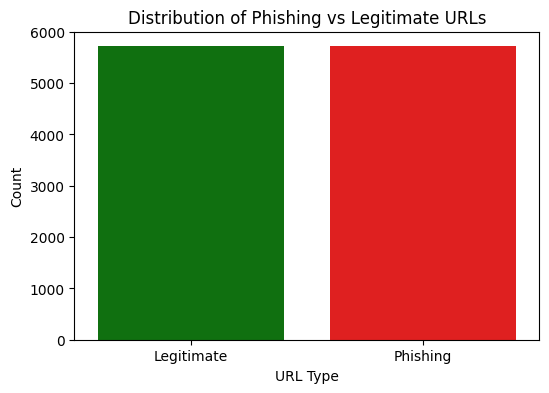

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette=["green", "red"])  # Green = legitimate, Red = phishing

# Labels
plt.xlabel("URL Type")
plt.ylabel("Count")
plt.title("Distribution of Phishing vs Legitimate URLs")
plt.xticks(ticks=[0, 1], labels=["Legitimate", "Phishing"])
plt.show()


<Axes: >

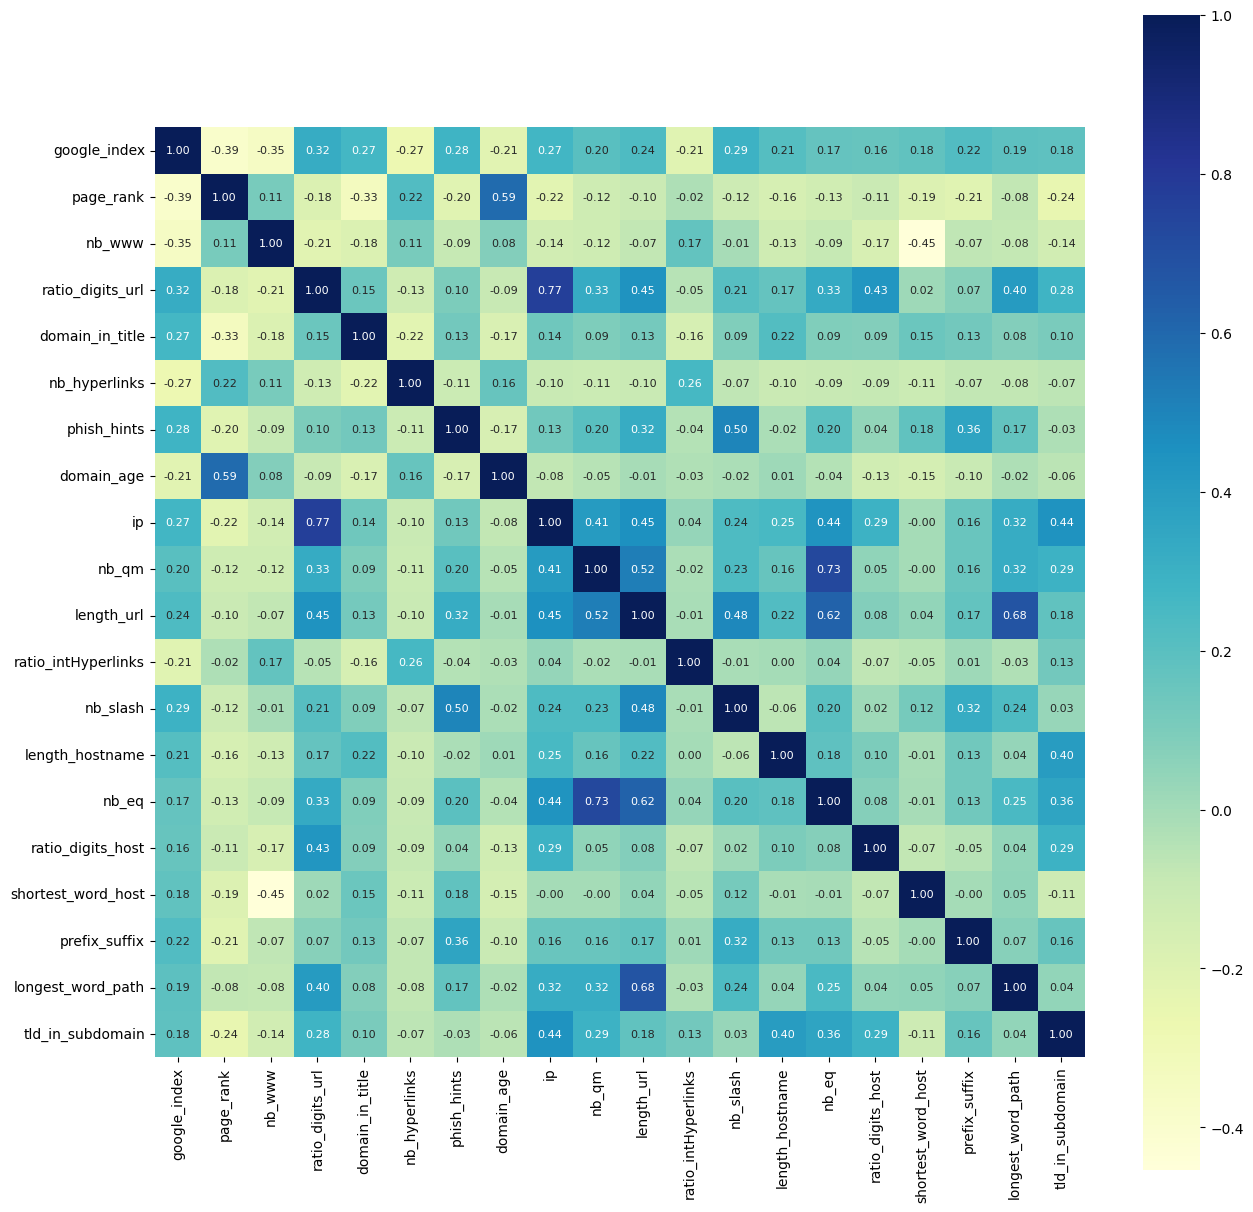

In [13]:
correlation=X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cbar=True,square=2,fmt='.2f',annot=True,annot_kws={'size':8},cmap="YlGnBu")

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
A_train,A_test,B_train,B_test=train_test_split(A,B,test_size=0.2,random_state=42)
model=RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=5, random_state=42)
model.fit(A_train,B_train)
B_pred=model.predict(A_test)
acc=accuracy_score(B_test,B_pred)
print(f"Accuracy: {acc:.4f}")  # Round to 4 decimal places
print(classification_report(B_test, B_pred))


Accuracy: 0.9619
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1157
           1       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



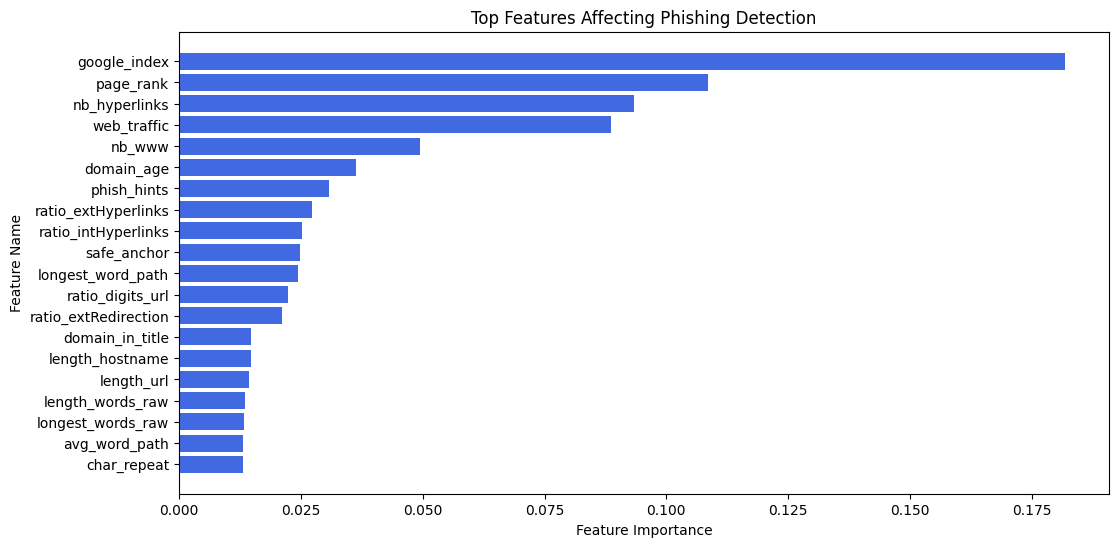

In [15]:
import numpy as np
import pandas as pd

# Get feature importance (for tree-based models)
feature_importance = model.feature_importances_

# Create DataFrame
features_df = pd.DataFrame({"Feature": A.columns, "Importance": feature_importance})
features_df = features_df.sort_values(by="Importance", ascending=False)

# Plot top 20 important features
plt.figure(figsize=(12, 6))
plt.barh(features_df["Feature"][:20], features_df["Importance"][:20], color="royalblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top Features Affecting Phishing Detection")
plt.gca().invert_yaxis()
plt.show()

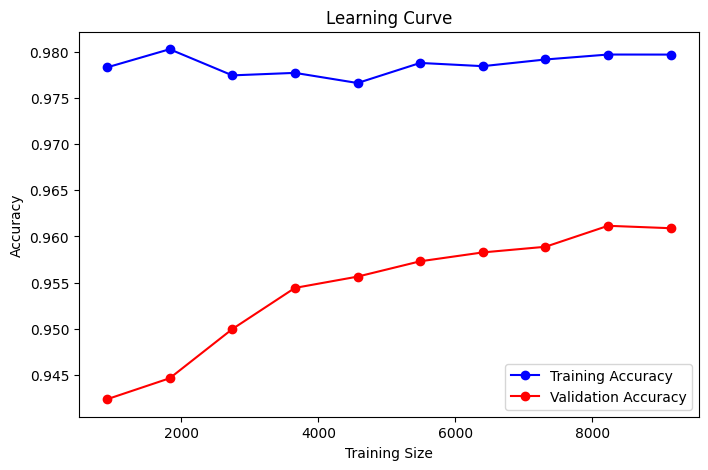

In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, A, B, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, "o-", label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, "o-", label="Validation Accuracy", color="red")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=5, random_state=42)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.4f}")  # Round to 4 decimal places
print(classification_report(y_test, y_pred))


Accuracy: 0.9571
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1157
           1       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



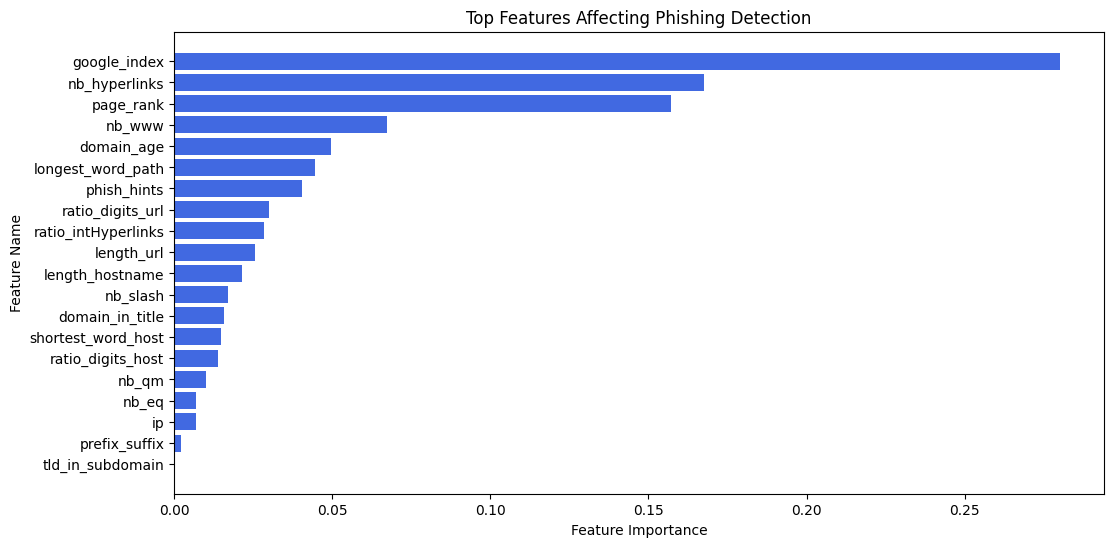

In [18]:
import numpy as np
import pandas as pd

# Get feature importance (for tree-based models)
feature_importance = model.feature_importances_

# Create DataFrame
features_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
features_df = features_df.sort_values(by="Importance", ascending=False)

# Plot top 20 important features
plt.figure(figsize=(12, 6))
plt.barh(features_df["Feature"][:20], features_df["Importance"][:20], color="royalblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top Features Affecting Phishing Detection")
plt.gca().invert_yaxis()
plt.show()


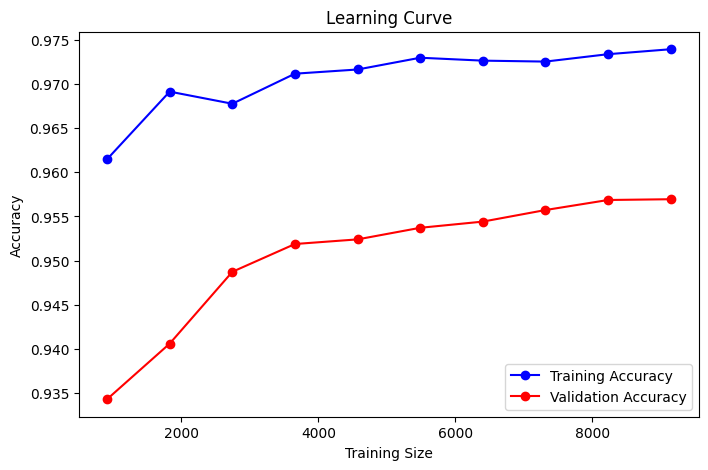

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, "o-", label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, "o-", label="Validation Accuracy", color="red")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


No GPU found. Using CPU.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/100
278/286 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5396 - loss: 26.5128
Epoch 1: val_accuracy improved from -inf to 0.57087, saving model to best_model.keras
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5400 - loss: 26.0441 - val_accuracy: 0.5709 - val_loss: 0.6512 - learning_rate: 0.0010
Epoch 2/100
277/286 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5877 - loss: 1.7874
Epoch 2: val_accuracy improved from 0.57087 to 0.67148, saving model to best_model.keras
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5877 - loss: 1.7767 - val_accuracy: 0.6715 - val_loss: 0.6192 - learning_rate: 0.0010
Epoch 3/100
285/286 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6097 - loss: 0.8443
Epoch 3: val_accuracy improved from 0.67148 to 0.68023, saving model to best_model.keras
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6098 - loss: 0.8441 - val_accuracy: 0.6802 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 4/100
281/286 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

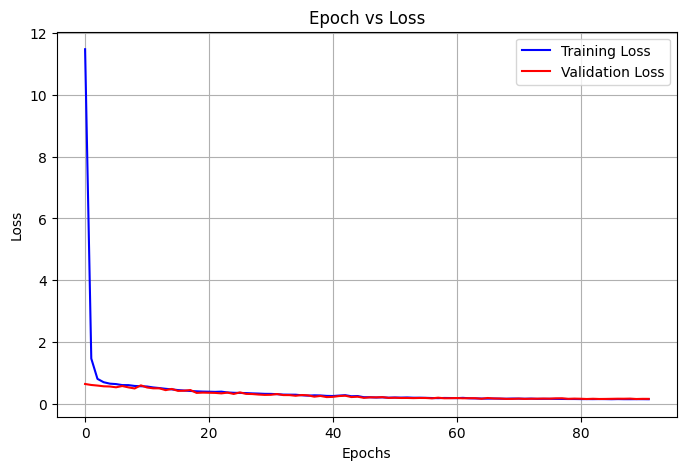

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tqdm.keras import TqdmCallback

# Ensure GPU is used if available
if tf.config.experimental.list_physical_devices('GPU'):
    print("GPU is available. Using GPU for training.")
    tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)
    tf.config.optimizer.set_jit(True)  # Enable XLA for better performance
else:
    print("No GPU found. Using CPU.")

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Save the best model
checkpoint = ModelCheckpoint(
    "best_model.keras", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1
)

# Train the model with tqdm progress bar
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr, checkpoint, TqdmCallback()]
)

# Load best model
model.load_weights("best_model.keras")

# Evaluate best model
loss, best_accuracy = model.evaluate(X_test, y_test)
print(f"Best Test Accuracy: {best_accuracy * 100:.2f}%")

# Plot Epoch vs Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.grid()
plt.show()


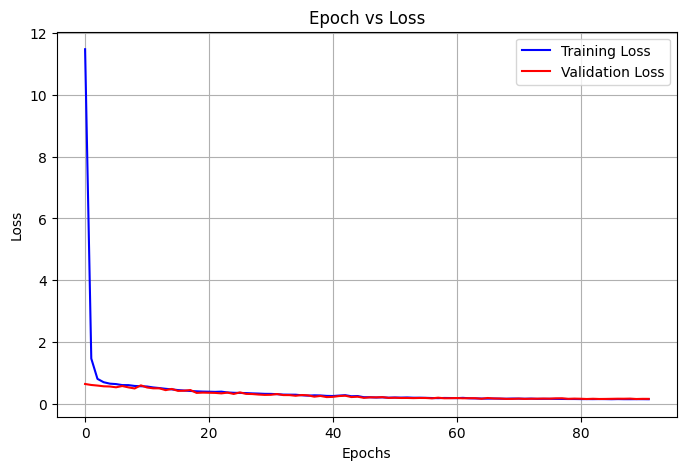

In [22]:
# Plot Epoch vs Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.grid()
plt.savefig("Epoch vs Loss.png",dpi = 2500)
plt.show()

Num GPUs Available: 0
Train: (8001, 20), Val: (1714, 20), Test: (1715, 20)


<ipython-input-28-6a4d14822855>:200: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f"Val Loss: {float(val_losses[-1]):.4f}, Test Loss: {float(test_losses[-1]):.4f},")


Epoch 1/35 - Time: 80.22s - Train Acc: 0.4957,- Epsilon: 1.0000, Val Acc: 0.9125, Test Acc: 0.8793 - Train Loss: 0.2654, Val Loss: 0.1543, Test Loss: 0.5387,
Epoch 2/35 - Time: 87.85s - Train Acc: 0.5404,- Epsilon: 0.9000, Val Acc: 0.9265, Test Acc: 0.9067 - Train Loss: 0.2024, Val Loss: 0.1640, Test Loss: 0.3997,
Epoch 3/35 - Time: 94.90s - Train Acc: 0.5741,- Epsilon: 0.8100, Val Acc: 0.9294, Test Acc: 0.9190 - Train Loss: 0.1911, Val Loss: 0.1792, Test Loss: 0.4327,
Epoch 4/35 - Time: 101.86s - Train Acc: 0.6228,- Epsilon: 0.7290, Val Acc: 0.9352, Test Acc: 0.9213 - Train Loss: 0.1622, Val Loss: 0.1844, Test Loss: 0.4030,
Epoch 5/35 - Time: 105.00s - Train Acc: 0.6442,- Epsilon: 0.6561, Val Acc: 0.9399, Test Acc: 0.9359 - Train Loss: 0.1631, Val Loss: 0.1997, Test Loss: 0.3842,
Epoch 6/35 - Time: 108.90s - Train Acc: 0.6698,- Epsilon: 0.5905, Val Acc: 0.9405, Test Acc: 0.9335 - Train Loss: 0.1497, Val Loss: 0.1916, Test Loss: 0.4195,
Epoch 7/35 - Time: 112.44s - Train Acc: 0.7095,- 

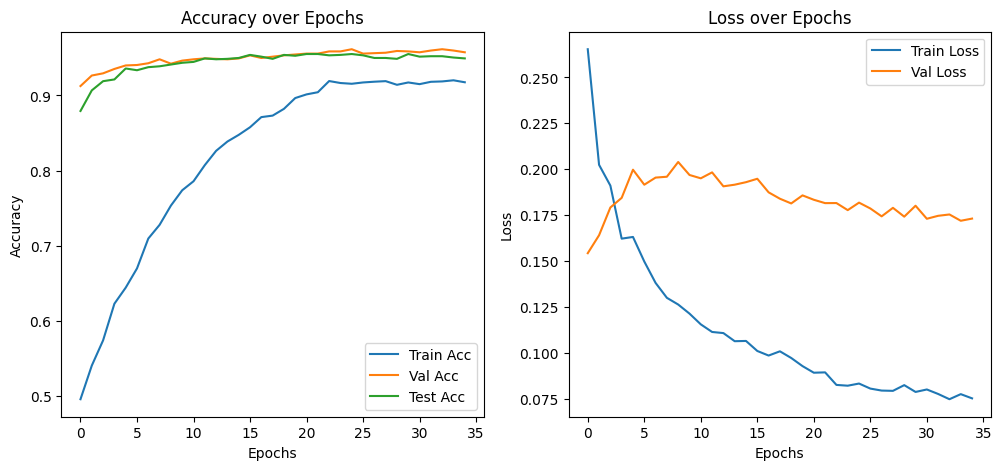

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

# Check GPU availability
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Enable Mixed Precision for faster computation on GPU
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Define the DQN Agent with GPU optimizations
class DQNAgent:
    def __init__(self, state_size, action_size, learning_rate=0.001):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate

        self.model = self.build_model()
        self.optimizer = tf.keras.optimizers.Adam(learning_rate)

    def build_model(self):
        # model = Sequential([
        #     Input(shape=(self.state_size,)),
        #     Dense(64, activation='relu'),
        #     Dense(32, activation='relu'),
        #     Dense(self.action_size, activation='linear', dtype='float32')
        # ])
        model = Sequential([
        Input(shape=(self.state_size,)),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(self.action_size, activation='linear', dtype='float32')   # Output is now a probability for binary classification
    ])
        return model

    def train_batch(self, states, actions, rewards, next_states, dones, batch_size=256):
        """
        Train the model on a batch of data and return loss.
        """
        with tf.GradientTape() as tape:
            q_values = self.model(states, training=True)
            q_targets = q_values.numpy()

            for i in range(len(actions)):
                target = rewards[i]
                if not dones[i]:
                    target += 0.95 * np.max(self.model(next_states[i:i+1]).numpy())
                q_targets[i, actions[i]] = target

            loss = tf.keras.losses.MSE(q_targets, q_values)

        gradients = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))

        return tf.reduce_mean(loss).numpy()  # Return loss as a scalar value

    def act(self, state, epsilon=0):
        if np.random.random() < epsilon:
            return np.random.randint(self.action_size)
        q_values = self.model(state, training=False)
        return np.argmax(q_values[0])

    def save(self, name):
        self.model.save_weights(name)


# Function to create a TensorFlow Dataset for faster training
def create_tf_dataset(X, y, batch_size=256):
    X = tf.cast(X, tf.float32)
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(len(X)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset


def fast_train_dqn(data, feature_cols=None, target_col='status', episodes=20,
                   learning_rate=0.001, epsilon_start=1.0, epsilon_min=0.1, epsilon_decay=0.9,
                   batch_size=256):

    # Prepare data
    X = data[feature_cols].fillna(0)
    y = data[target_col].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X).astype(np.float32)

    # Split into Train (70%), then split remaining into Val and Test (15% each)
    X_train, X_val_test, y_train, y_val_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

    print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

    agent = DQNAgent(X_train.shape[1], 2, learning_rate)

    train_dataset = create_tf_dataset(X_train, y_train, batch_size)
    val_dataset = create_tf_dataset(X_val, y_val, batch_size)

    train_accuracies, val_accuracies, test_accuracies = [], [], []
    train_losses, val_losses, test_losses = [], [], []

    # Training Loop
    for episode in range(episodes):
        start_time = time.time()
        epsilon = max(epsilon_min, epsilon_start * (epsilon_decay ** episode))
        correct_train = 0
        total_train_loss = 0

        # Training
        for batch_X, batch_y in train_dataset:
            batch_y = tf.convert_to_tensor(batch_y)

            memory_states, memory_actions, memory_rewards, memory_next_states, memory_dones = [], [], [], [], []

            for i in range(batch_X.shape[0]):
                state = batch_X[i:i+1]
                action = agent.act(state, epsilon)
                reward = 1 if action == int(batch_y[i].numpy()) else -1
                next_state = state  # next_state is same as state in this example
                done = True

                memory_states.append(state[0].numpy())
                memory_actions.append(action)
                memory_rewards.append(reward)
                memory_next_states.append(next_state[0].numpy())
                memory_dones.append(done)

                if action == int(batch_y[i].numpy()):
                    correct_train += 1

            states_batch = tf.convert_to_tensor(np.array(memory_states), dtype=tf.float32)
            next_states_batch = tf.convert_to_tensor(np.array(memory_next_states), dtype=tf.float32)
            actions_batch = tf.convert_to_tensor(np.array(memory_actions), dtype=tf.int32)
            rewards_batch = tf.convert_to_tensor(np.array(memory_rewards), dtype=tf.float32)
            dones_batch = tf.convert_to_tensor(np.array(memory_dones), dtype=tf.bool)

            loss = agent.train_batch(states_batch, actions_batch, rewards_batch,
                                     next_states_batch, dones_batch, batch_size=batch_size)
            total_train_loss += loss

        train_acc = correct_train / len(X_train)
        train_accuracies.append(train_acc)
        train_losses.append(total_train_loss / len(train_dataset))

        # Validation
        val_correct = 0
        total_val_loss = 0
        for batch_X, batch_y in val_dataset:
            batch_y = tf.convert_to_tensor(batch_y)
            for i in range(batch_X.shape[0]):
                state = tf.reshape(batch_X[i], (1, -1))
                action = agent.act(state, epsilon=0)
                if action == batch_y[i].numpy():
                    val_correct += 1
            # For validation loss, use the whole batch (dummy train_batch call for loss computation)
            loss = agent.train_batch(batch_X, batch_y, batch_y, batch_X, tf.zeros_like(batch_y), batch_size=batch_size)
            total_val_loss += loss

        val_acc = val_correct / len(X_val)
        val_accuracies.append(val_acc)
        val_losses.append(total_val_loss / len(val_dataset))

        # Test Evaluation
        test_correct = 0
        total_test_loss = 0
        for i in range(len(X_test)):
            state = tf.reshape(X_test[i], (1, -1))
            action = agent.act(state, epsilon=0)
            if action == y_test[i]:
                test_correct += 1
            # Compute loss for test sample
            q_values = agent.model(state, training=False)
            target_q = np.zeros_like(q_values.numpy())
            target_q[0, y_test[i]] = 1.0
            loss = tf.keras.losses.MSE(target_q, q_values)
            total_test_loss += loss.numpy()
        test_acc = test_correct / len(X_test)
        test_accuracies.append(test_acc)
        test_losses.append(total_test_loss / len(X_test))

        # Convert loss values to float for formatting
        print(f"Epoch {episode+1}/{episodes} - Time: {time.time() - start_time:.2f}s - "
              f"Train Acc: {train_accuracies[-1]:.4f},- Epsilon: {epsilon:.4f}, Val Acc: {val_accuracies[-1]:.4f}, "
              f"Test Acc: {test_accuracies[-1]:.4f} - Train Loss: {float(train_losses[-1]):.4f}, "
              f"Val Loss: {float(val_losses[-1]):.4f}, Test Loss: {float(test_losses[-1]):.4f},")

    return agent, scaler, train_accuracies, val_accuracies, test_accuracies, train_losses, val_losses, test_losses


# Example: Assume 'data' is your DataFrame and 'feature_cols' is defined
# Replace with your actual DataFrame:
# data = pd.read_csv("your_data.csv")

feature_cols = [
    'google_index', 'page_rank', 'nb_www', 'ratio_digits_url',
    'domain_in_title', 'nb_hyperlinks', 'phish_hints', 'domain_age',
    'ip', 'nb_qm', 'length_url', 'ratio_intHyperlinks', 'nb_slash',
    'length_hostname', 'nb_eq', 'ratio_digits_host', 'shortest_word_host',
    'prefix_suffix', 'longest_word_path', 'tld_in_subdomain'
]

# Train the model (using 30 epochs for this example)
agent, scaler, train_acc, val_acc, test_acc, train_loss, val_loss, test_loss = fast_train_dqn(
    data, feature_cols=feature_cols, episodes=35
)

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.plot(test_acc, label='Test Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend()

plt.show()


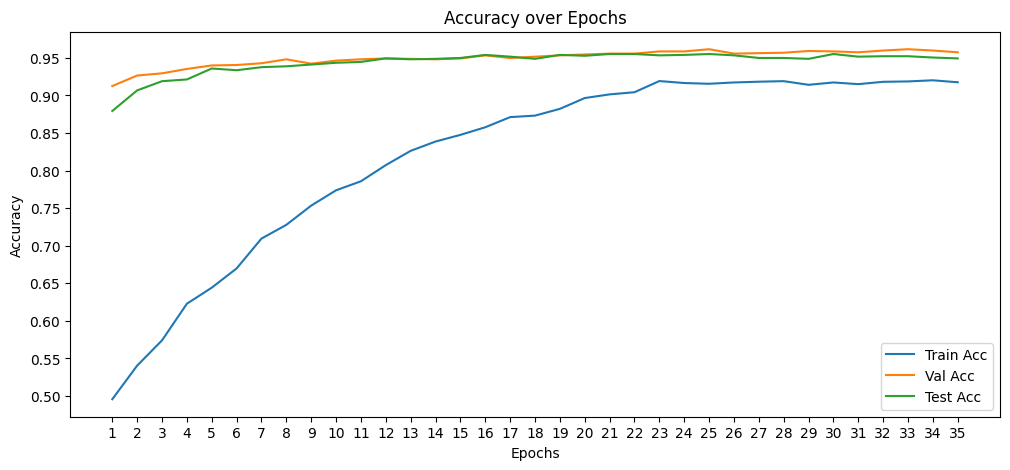

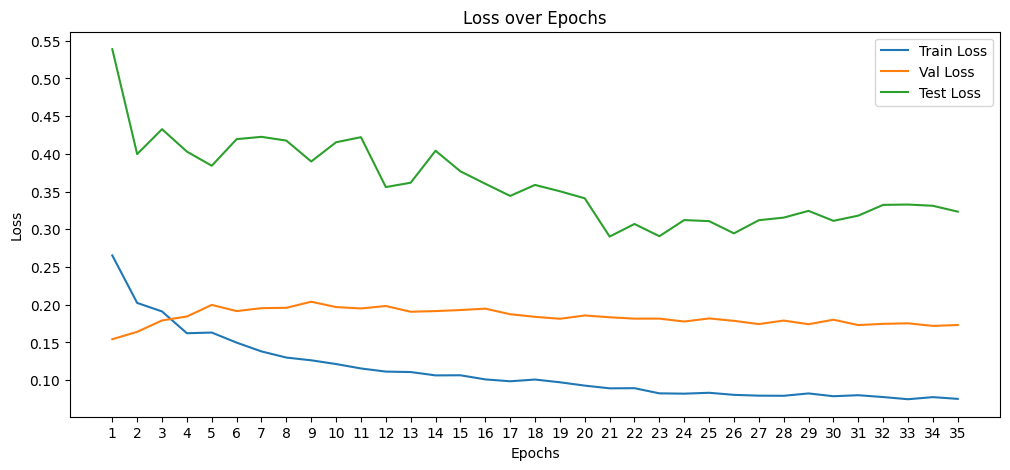

In [32]:
# Example data (replace with actual values)
epochs = range(1, 35 + 1)

# Convert to Python scalars before applying max()
max_train_loss = np.max(train_loss).item()
max_val_loss = np.max(val_loss).item()
max_test_loss = np.max(test_loss).item()
 
# Find the global max and ensure it's a scalar
max_loss_value = max(max_train_loss, max_val_loss, max_test_loss)


plt.figure(figsize=(12, 5)) 
# Accuracy Plot
plt.plot(epochs, train_acc, label='Train Acc')
plt.plot(epochs, val_acc, label='Val Acc')
plt.plot(epochs, test_acc, label='Test Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.xticks(epochs)  # Set x-ticks to epochs
plt.yticks(np.arange(0.5, 1, 0.05))  # Y-ticks from 0.5 to 1.1 with 0.05 intervals
plt.legend()
plt.savefig("Accuracy over Epochs", dpi=2500)
plt.show()

plt.figure(figsize=(12, 5))

# Loss Plot
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Val Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.xticks(epochs)  # Set x-ticks to epochs
plt.yticks(np.arange(0.1, max_loss_value + 0.05, 0.05))  # Adjust dynamically
plt.legend()
plt.savefig("Loss over Epochs", dpi=2500)
plt.show()

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend()
plt.savefig("Loss over Epochs Train vs Val",dpi = 2500)
plt.show()

In [33]:
agent.model.save_weights("dqn_model.weights.h5")


In [34]:
agent.model.save("dqn_model.h5")

